<a href="https://colab.research.google.com/github/nilambedare89-collab/project2/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive has been mounted successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive has been mounted successfully.


In [6]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='latin-1')
print(f"Dataset loaded successfully from {file_path}.")
df.head()

Dataset loaded successfully from /content/drive/MyDrive/dataset/IMDb Movies India.csv.


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
initial_rows = df.shape[0]
df = df.drop_duplicates()
final_rows = df.shape[0]

print(f"Initial number of rows: {initial_rows}")
print(f"Final number of rows after removing duplicates: {final_rows}")
print(f"Number of duplicate rows removed: {initial_rows - final_rows}")
print(f"New shape of the DataFrame after removing duplicates: {df.shape}")

Initial number of rows: 15503
Final number of rows after removing duplicates: 15503
Number of duplicate rows removed: 0
New shape of the DataFrame after removing duplicates: (15503, 10)


In [43]:
print("Shape of the cleaned DataFrame:", df.shape)
print("\nInformation about the cleaned DataFrame:")
df.info()
print("\nFirst 5 rows of the cleaned DataFrame:")
df.head()

Shape of the cleaned DataFrame: (7919, 34)

Information about the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         7919 non-null   object 
 1   Year         7919 non-null   Int64  
 2   Duration     7919 non-null   Int64  
 3   Rating       7919 non-null   float64
 4   Votes        7919 non-null   Int64  
 5   Director     7919 non-null   object 
 6   Actor 1      7919 non-null   object 
 7   Actor 2      7919 non-null   object 
 8   Actor 3      7919 non-null   object 
 9   Action       7919 non-null   int64  
 10  Adventure    7919 non-null   int64  
 11  Animation    7919 non-null   int64  
 12  Biography    7919 non-null   int64  
 13  Comedy       7919 non-null   int64  
 14  Crime        7919 non-null   int64  
 15  Documentary  7919 non-null   int64  
 16  Drama        7919 non-null   int64  
 17  Family   

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
1,#Gadhvi (He thought he was Gandhi),2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,...,0,0,1,0,0,0,0,0,0,0
5,...Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,...,0,0,0,0,0,0,0,0,0,0
6,...Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,...,0,0,1,0,0,0,0,0,1,0
8,?: A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
import numpy as np

# 1. Clean 'Year' column
initial_missing_year = df['Year'].isnull().sum()
df['Year'] = df['Year'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64') # Using 'Int64' to allow NaN
final_missing_year = df['Year'].isnull().sum()
print(f"'Year' column - Initial missing values: {initial_missing_year}, Final missing values: {final_missing_year}")

# 2. Clean 'Duration' column
initial_missing_duration = df['Duration'].isnull().sum()
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce').astype('Int64') # Using 'Int64' to allow NaN
final_missing_duration = df['Duration'].isnull().sum()
print(f"'Duration' column - Initial missing values: {initial_missing_duration}, Final missing values: {final_missing_duration}")

# 3. Clean 'Votes' column
initial_missing_votes = df['Votes'].isnull().sum()
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce').astype('Int64') # Using 'Int64' to allow NaN
final_missing_votes = df['Votes'].isnull().sum()
print(f"'Votes' column - Initial missing values: {initial_missing_votes}, Final missing values: {final_missing_votes}")

# 4. Convert 'Rating' column to numeric
initial_missing_rating = df['Rating'].isnull().sum()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
final_missing_rating = df['Rating'].isnull().sum()
print(f"'Rating' column - Initial missing values: {initial_missing_rating}, Final missing values: {final_missing_rating}")

# 5. Print data types to verify
print("\nData types after conversion:")
print(df[['Year', 'Duration', 'Votes', 'Rating']].dtypes)

AttributeError: Can only use .str accessor with string values!

In [13]:
print(f"DataFrame shape before processing 'Genre': {df.shape}")

# 1. Fill any missing values in the 'Genre' column with the string 'Unknown'.
df['Genre'] = df['Genre'].fillna('Unknown') # Addressed FutureWarning

# 2. Use str.get_dummies(sep=',') on the 'Genre' column to create new binary columns for each unique genre.
genre_dummies = df['Genre'].str.get_dummies(sep=', ')

# 3. Concatenate this new genre DataFrame with the original DataFrame df, making sure to drop the original 'Genre' column.
df = pd.concat([df.drop('Genre', axis=1), genre_dummies], axis=1)

print(f"DataFrame shape after processing 'Genre': {df.shape}")
print("First 5 rows of DataFrame after 'Genre' processing:")
print(df.head())

# 4. Fill missing values for 'Director', 'Actor 1', 'Actor 2', and 'Actor 3' columns with 'Unknown'.
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    initial_missing = df[col].isnull().sum()
    df[col] = df[col].fillna('Unknown')
    final_missing = df[col].isnull().sum()
    print(f"'{col}' column - Initial missing values: {initial_missing}, Final missing values: {final_missing}")

# 5. Calculate and print the value counts for each of these columns.
print("\nValue counts for Director, Actor 1, Actor 2, Actor 3:")
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    print(f"\n{col} Top 10:")
    print(df[col].value_counts().head(10))

DataFrame shape before processing 'Genre': (15503, 34)


KeyError: 'Genre'

In [14]:
print(f"DataFrame shape before processing 'Director', 'Actor 1', 'Actor 2', 'Actor 3': {df.shape}")

# 4. Fill missing values for 'Director', 'Actor 1', 'Actor 2', and 'Actor 3' columns with 'Unknown'.
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    initial_missing = df[col].isnull().sum()
    df[col] = df[col].fillna('Unknown')
    final_missing = df[col].isnull().sum()
    print(f"'{col}' column - Initial missing values: {initial_missing}, Final missing values: {final_missing}")

# 5. Calculate and print the value counts for each of these columns.
print("\nValue counts for Director, Actor 1, Actor 2, Actor 3:")
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    print(f"\n{col} Top 10:")
    print(df[col].value_counts().head(10))

DataFrame shape before processing 'Director', 'Actor 1', 'Actor 2', 'Actor 3': (15503, 34)
'Director' column - Initial missing values: 524, Final missing values: 0
'Actor 1' column - Initial missing values: 1615, Final missing values: 0
'Actor 2' column - Initial missing values: 2381, Final missing values: 0
'Actor 3' column - Initial missing values: 3140, Final missing values: 0

Value counts for Director, Actor 1, Actor 2, Actor 3:

Director Top 10:
Director
Unknown            524
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Nanabhai Bhatt      46
Master Bhagwan      46
Dhirubhai Desai     46
B.R. Ishara         44
David Dhawan        44
Name: count, dtype: int64

Actor 1 Top 10:
Actor 1
Unknown               1615
Ashok Kumar            158
Dharmendra             140
Jeetendra              140
Mithun Chakraborty     133
Amitabh Bachchan       129
Rajesh Khanna          122
Dev Anand               93
Shashi Kapoor           91
Akshay Kuma

In [15]:
print("Missing values before any imputation/dropping:")
print(df[['Year', 'Duration', 'Votes', 'Rating']].isnull().sum())

Missing values before any imputation/dropping:
Year         527
Duration    8264
Votes       7584
Rating      7584
dtype: int64


In [16]:
initial_rows_before_na = df.shape[0]
df.dropna(subset=['Rating'], inplace=True)
final_rows_after_na = df.shape[0]

print(f"Rows dropped due to missing 'Rating': {initial_rows_before_na - final_rows_after_na}")
print(f"DataFrame shape after dropping rows with missing 'Rating': {df.shape}")

Rows dropped due to missing 'Rating': 7584
DataFrame shape after dropping rows with missing 'Rating': (7919, 34)


In [17]:
median_year = df['Year'].median()
median_duration = df['Duration'].median()
median_votes = df['Votes'].median()

print(f"Median for 'Year': {median_year}")
print(f"Median for 'Duration': {median_duration}")
print(f"Median for 'Votes': {median_votes}")

Median for 'Year': 1997.0
Median for 'Duration': 134.0
Median for 'Votes': 55.0


In [18]:
print("Missing values before imputation:")
print(df[['Year', 'Duration', 'Votes']].isnull().sum())

df['Year'].fillna(median_year, inplace=True)
df['Duration'].fillna(median_duration, inplace=True)
df['Votes'].fillna(median_votes, inplace=True)

print("\nMissing values after imputation:")
print(df[['Year', 'Duration', 'Votes']].isnull().sum())

Missing values before imputation:
Year           0
Duration    2068
Votes          0
dtype: int64

Missing values after imputation:
Year        0
Duration    0
Votes       0
dtype: int64


/tmp/ipython-input-902/1219653772.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(median_year, inplace=True)
/tmp/ipython-input-902/1219653772.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [19]:
print("Missing values before imputation:")
print(df[['Year', 'Duration', 'Votes']].isnull().sum())

df['Year'] = df['Year'].fillna(median_year)
df['Duration'] = df['Duration'].fillna(median_duration)
df['Votes'] = df['Votes'].fillna(median_votes)

print("\nMissing values after imputation:")
print(df[['Year', 'Duration', 'Votes']].isnull().sum())

Missing values before imputation:
Year        0
Duration    0
Votes       0
dtype: int64

Missing values after imputation:
Year        0
Duration    0
Votes       0
dtype: int64


In [20]:
print("Final check for missing values in target numerical columns:")
print(df[['Year', 'Duration', 'Votes', 'Rating']].isnull().sum())

Final check for missing values in target numerical columns:
Year        0
Duration    0
Votes       0
Rating      0
dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define the target variable y as the 'Rating' column
y = df['Rating']

# 2. Define the features X by dropping the 'Name' and 'Rating' columns
X = df.drop(columns=['Name', 'Rating'])

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (6335, 32)
Shape of X_test: (1584, 32)
Shape of y_train: (6335,)
Shape of y_test: (1584,)


In [22]:
import pandas as pd

# 4. Identify the numerical columns in X_train that need scaling
numerical_cols = ['Year', 'Duration', 'Votes']

# 5. Initialize a StandardScaler
scaler = StandardScaler()

# 6. Fit the scaler on X_train using only the identified numerical columns, and then transform both X_train and X_test for these columns.
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 7. Print the shapes of X_train, X_test, y_train, and y_test to verify the split and display the first 5 rows of X_train after scaling the numerical features.
print(f"Shape of X_train after scaling: {X_train.shape}")
print(f"Shape of X_test after scaling: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("\nFirst 5 rows of X_train after scaling numerical features:")
print(X_train.head())

Shape of X_train after scaling: (6335, 32)
Shape of X_test after scaling: (1584, 32)
Shape of y_train: (6335,)
Shape of y_test: (1584,)

First 5 rows of X_train after scaling numerical features:
           Year  Duration     Votes      Director        Actor 1  \
8157   1.257543 -2.585815 -0.169993  Ronit Jadhav   Ronit Jadhav   
8455  -0.596569  0.057114 -0.169478   Shibu Mitra  Shashi Kapoor   
14490  1.159958  0.145212  1.355432    Kabir Khan    Salman Khan   
2697   0.476864 -0.691716 -0.169392  Gautam Verma     Rajat Bedi   
15470 -0.255022 -0.559569 -0.168018    Sandip Ray  Kishore Kumar   

                  Actor 2         Actor 3  Action  Adventure  Animation  ...  \
8157        Rohit D'Souza  Darshil Gandhi       0          0          0  ...   
8455                 Pran      Amjad Khan       0          0          0  ...   
14490         Sohail Khan         Om Puri       0          0          0  ...   
2697   Mithun Chakraborty   Dinesh Hingoo       1          0          0  ...

In [45]:
from sklearn.ensemble import RandomForestRegressor

# 1. Instantiate a RandomForestRegressor model
# Using random_state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# 2. Train the model using the fit() method
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


In [46]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Make predictions on the X_test data
y_pred = rf_model.predict(X_test)

# 2. Calculate the regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 3. Print all calculated metrics
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R2): {r2:.3f}")

Mean Absolute Error (MAE): 0.789
Mean Squared Error (MSE): 1.129
Root Mean Squared Error (RMSE): 1.062
R-squared (R2): 0.393


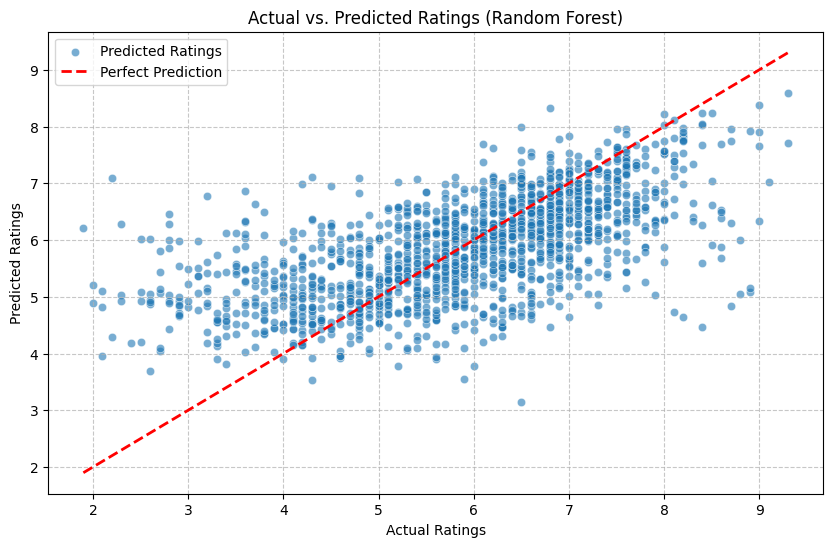

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8. Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted Ratings', alpha=0.6)

# 9. Add a diagonal line representing perfect predictions (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# 10. Set the x-axis label as 'Actual Ratings' and the y-axis label as 'Predicted Ratings'.
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

# 11. Add a title to the plot
plt.title('Actual vs. Predicted Ratings (Random Forest)')

# 12. Include a legend for the scatter points and the perfect prediction line.
plt.legend()

# 13. Display the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
